# 🌤 Solar Data Analysis and prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# lets read the dataset
data = pd.read_csv("/content/solar_data_copy_10%.csv")

In [ ]:
data.head()

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572
1,27-04-2022 15:34,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452
2,27-04-2022 15:36,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568
3,27-04-2022 15:38,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.06504
4,27-04-2022 15:40,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.89576


In [ ]:
data.shape

(1009, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1009 non-null   object 
 1   Air_Temp           1009 non-null   float64
 2   Relative_Humidity  1009 non-null   float64
 3   Wind_Speed         1009 non-null   float64
 4   Wind_Direction     1009 non-null   float64
 5   Solar_Radiation    1009 non-null   float64
 6   RTD_1              1009 non-null   float64
 7   RTD_2              1009 non-null   float64
 8   RTD_3              1009 non-null   float64
 9   RTD_4              1009 non-null   float64
 10  RTD_5              1009 non-null   float64
 11  Array_Voltage      1009 non-null   float64
 12  Array_Current      1009 non-null   float64
 13  Power_Generated    1009 non-null   float64
dtypes: float64(13), object(1)
memory usage: 110.5+ KB


# Visualizing the Data

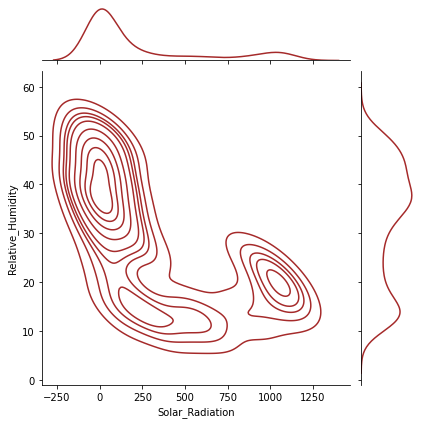

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Relative_Humidity',data = data, kind = 'kde' ,color = 'brown')

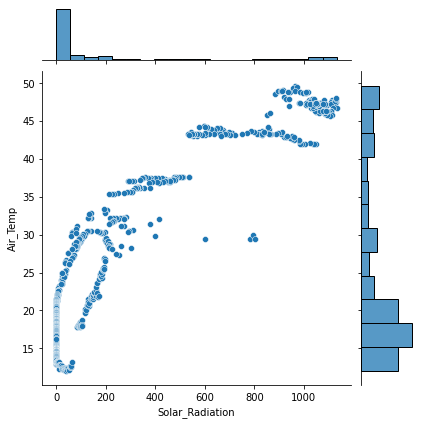

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Air_Temp',data = data)

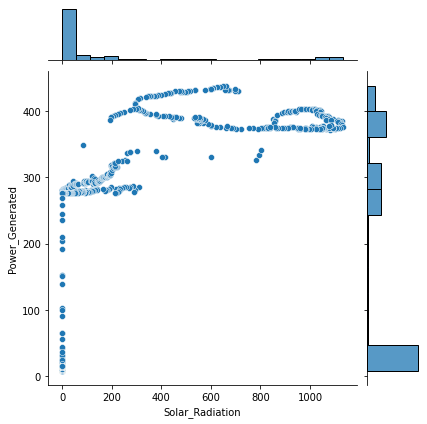

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Power_Generated',data = data)

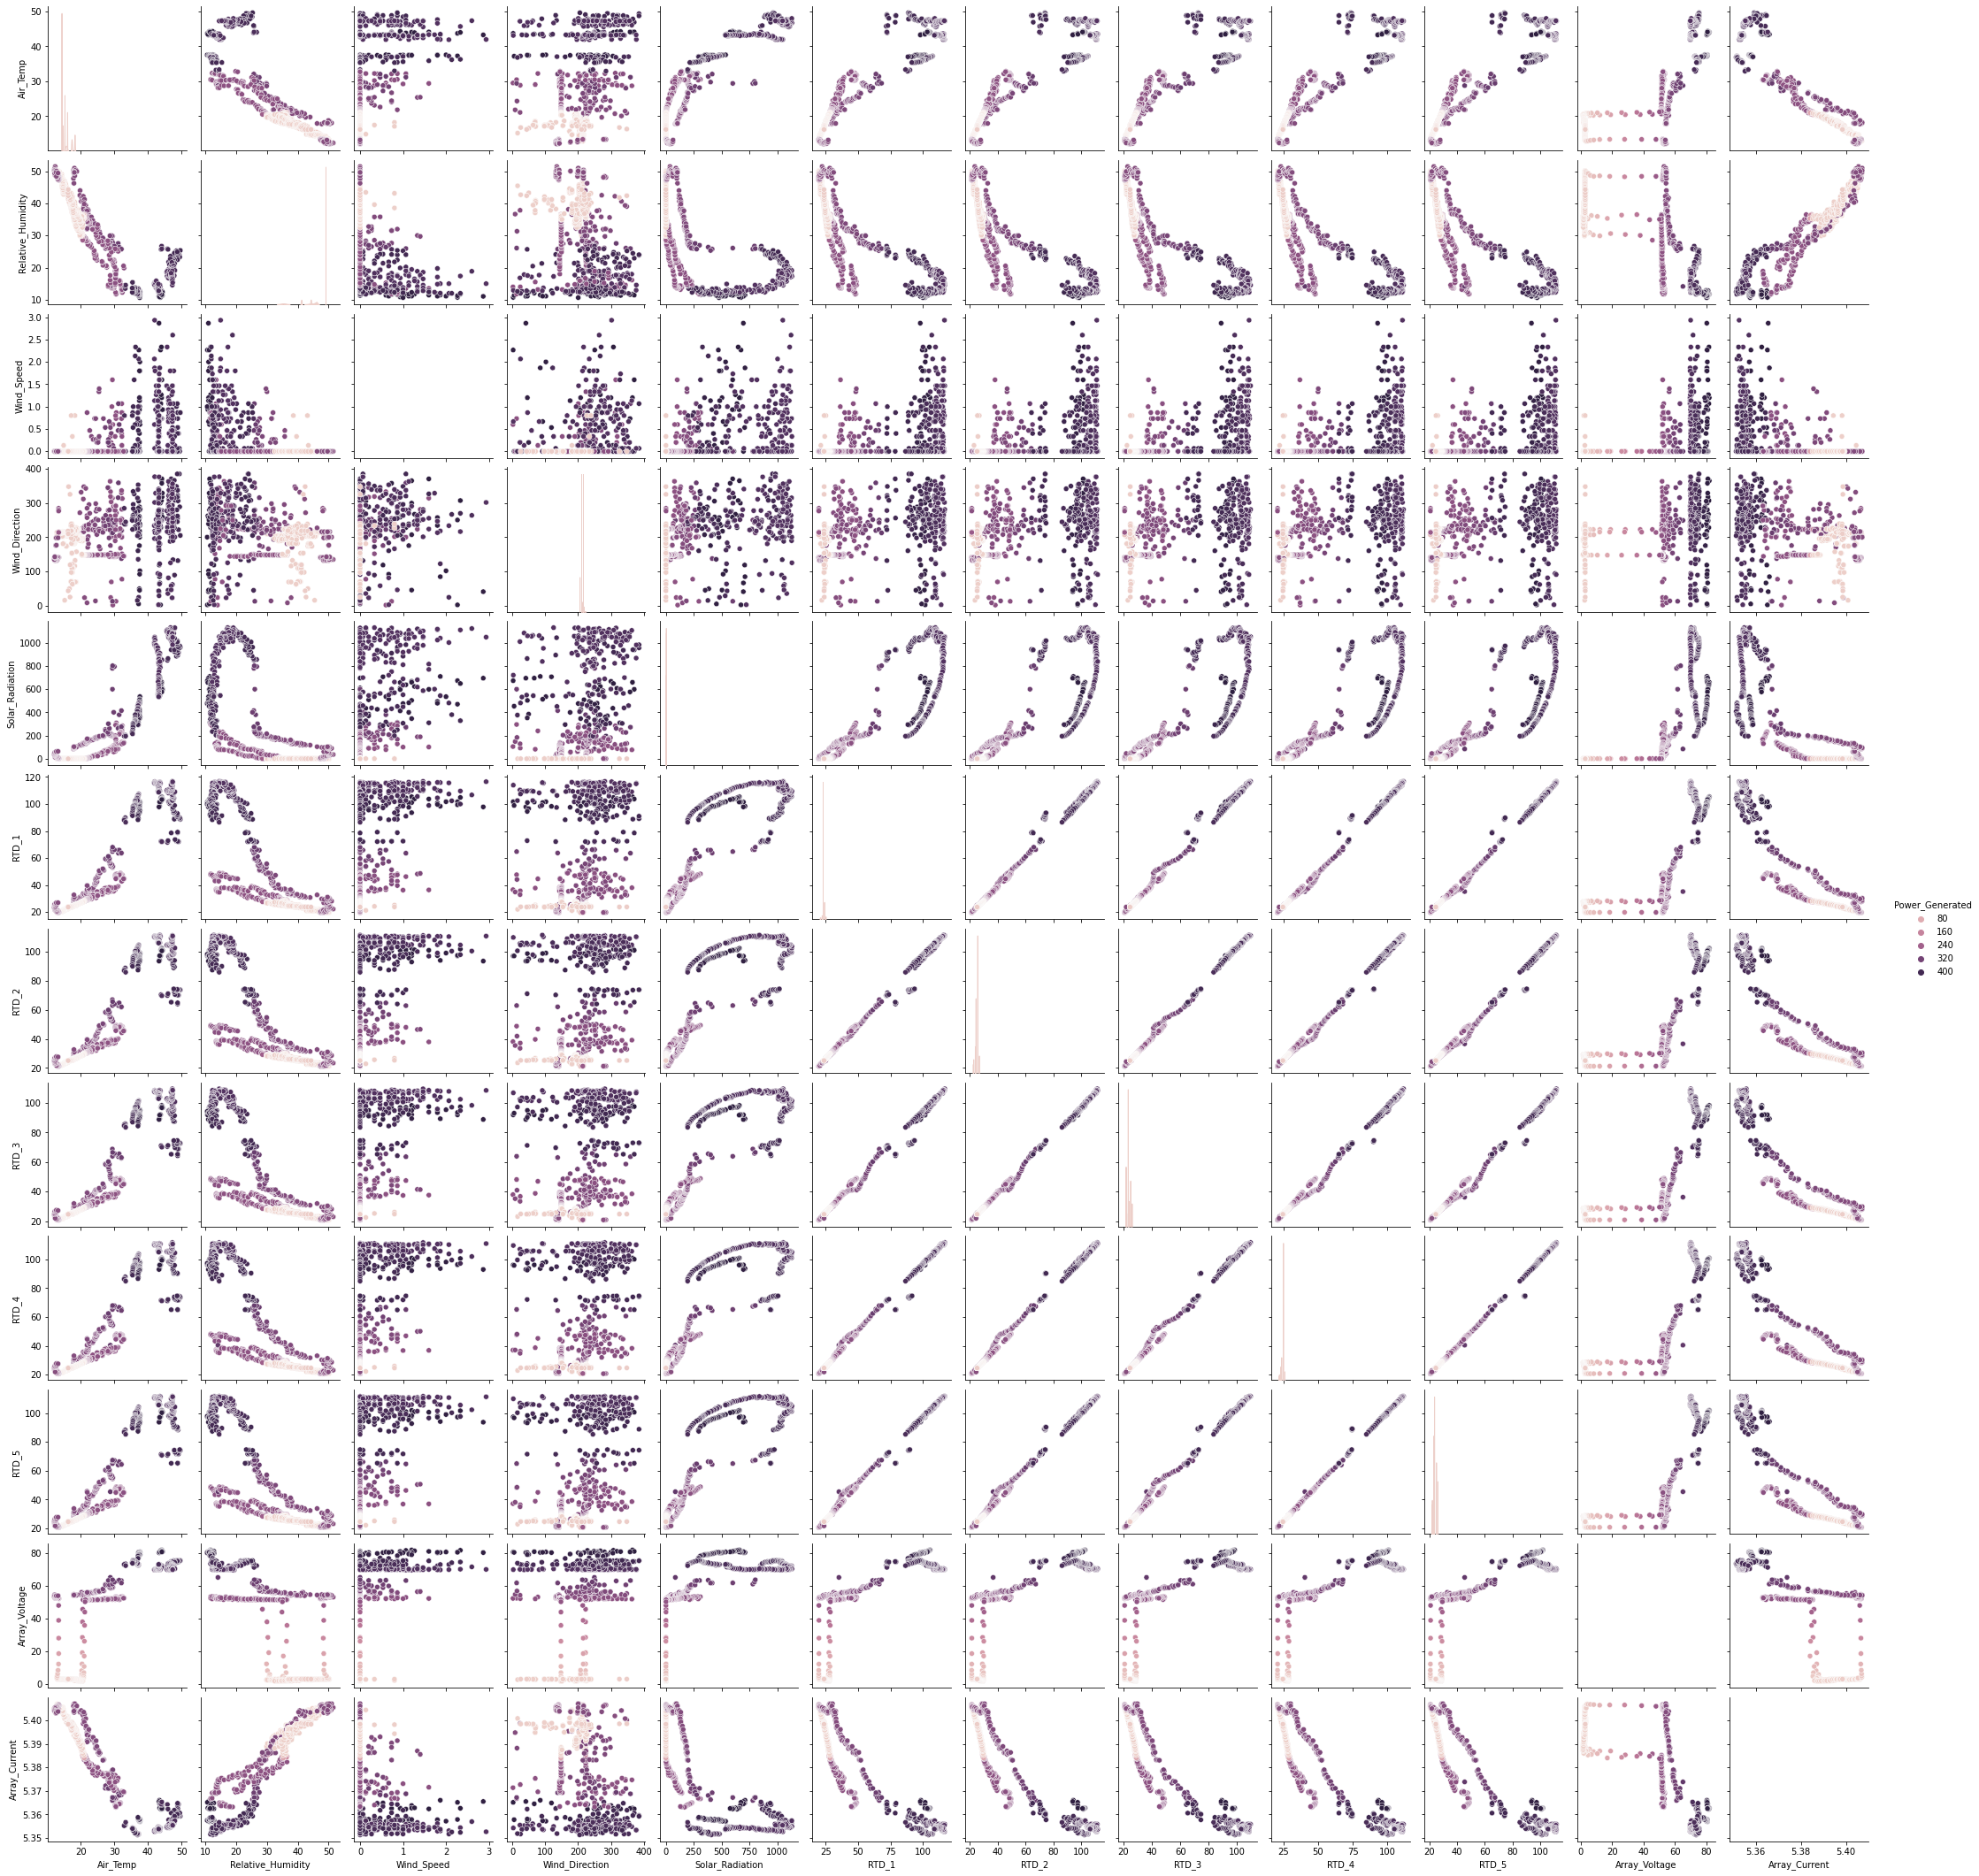

In [ ]:
sns.pairplot(data, hue= 'Power_Generated')

In [ ]:
# Removing the two columns which is not in need
waste1 = data.pop("Timestamp")
# waste2 = data.pop("Wind_Direction")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1009 non-null   float64
 1   Relative_Humidity  1009 non-null   float64
 2   Wind_Speed         1009 non-null   float64
 3   Wind_Direction     1009 non-null   float64
 4   Solar_Radiation    1009 non-null   float64
 5   RTD_1              1009 non-null   float64
 6   RTD_2              1009 non-null   float64
 7   RTD_3              1009 non-null   float64
 8   RTD_4              1009 non-null   float64
 9   RTD_5              1009 non-null   float64
 10  Array_Voltage      1009 non-null   float64
 11  Array_Current      1009 non-null   float64
 12  Power_Generated    1009 non-null   float64
dtypes: float64(13)
memory usage: 102.6 KB


# Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

numericals = ['Air_Temp','Relative_Humidity','Wind_Speed','Solar_Radiation','RTD_1','RTD_2','RTD_3','RTD_4','RTD_5','Array_Voltage','Array_Current','Power_Generated']

data[numericals] = scaler.fit_transform(data[numericals])

In [ ]:
data.head(5)

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,1.574564,-1.543618,0.814157,118.786620,1.352771,1.505487,1.497464,1.411373,1.461600,1.471676,1.486584,-1.019787,1.485977
1,1.581984,-1.650873,3.883984,84.681408,1.360968,1.508074,1.494121,1.422203,1.470963,1.470572,1.489439,-0.957215,1.489400
2,1.569087,-1.685103,6.186353,40.807156,1.319129,1.493074,1.479114,1.406209,1.450584,1.456315,1.486880,-0.986045,1.486579
3,1.589775,-1.603036,-0.413772,66.390848,1.321185,1.599161,1.586953,1.507995,1.549679,1.565429,1.504315,-1.038847,1.503541
4,1.607768,-1.711483,4.804932,2.127408,1.259106,1.604852,1.591419,1.508563,1.548570,1.571468,1.496976,-1.005105,1.496506


In [ ]:
waste2 = data.pop("Wind_Direction")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1009 non-null   float64
 1   Relative_Humidity  1009 non-null   float64
 2   Wind_Speed         1009 non-null   float64
 3   Solar_Radiation    1009 non-null   float64
 4   RTD_1              1009 non-null   float64
 5   RTD_2              1009 non-null   float64
 6   RTD_3              1009 non-null   float64
 7   RTD_4              1009 non-null   float64
 8   RTD_5              1009 non-null   float64
 9   Array_Voltage      1009 non-null   float64
 10  Array_Current      1009 non-null   float64
 11  Power_Generated    1009 non-null   float64
dtypes: float64(12)
memory usage: 94.7 KB


In [ ]:
Y = data.pop('Power_Generated')

X = data

In [ ]:
# spliting the data into train and test 
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
#  LSTM Model 
import tensorflow as tf

tf.random.set_seed(42)
 
model_1 = tf.keras.Sequential([tf.keras.layers.LSTM(300,activation='relu',return_sequences=True,input_shape=(11,1)),
                               tf.keras.layers.LSTM(200,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = "mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

history_1 = model_1.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=9)

Epoch 1/9
26/26 [==============================] - 5s 88ms/step - loss: 2.1572 - mae: 2.1572
Epoch 2/9
26/26 [==============================] - 2s 84ms/step - loss: 0.3743 - mae: 0.3743
Epoch 3/9
26/26 [==============================] - 2s 86ms/step - loss: 0.2426 - mae: 0.2426
Epoch 4/9
26/26 [==============================] - 2s 87ms/step - loss: 0.1938 - mae: 0.1938
Epoch 5/9
26/26 [==============================] - 2s 85ms/step - loss: 0.1934 - mae: 0.1934
Epoch 6/9
26/26 [==============================] - 2s 84ms/step - loss: 0.1842 - mae: 0.1842
Epoch 7/9
26/26 [==============================] - 2s 85ms/step - loss: 0.1457 - mae: 0.1457
Epoch 8/9
26/26 [==============================] - 2s 84ms/step - loss: 0.1251 - mae: 0.1251
Epoch 9/9
26/26 [==============================] - 2s 84ms/step - loss: 0.1302 - mae: 0.1302


Text(0.5, 0, 'Epochs')

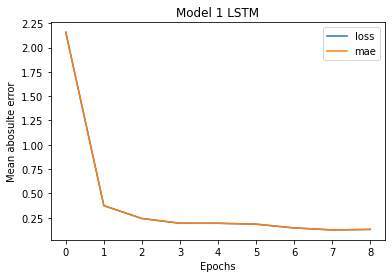

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.title("Model 1 LSTM")
plt.ylabel("Mean abosulte error")
plt.xlabel("Epochs")

In [ ]:
model_1.evaluate(X_test,Y_test)

7/7 [==============================] - 1s 27ms/step - loss: 0.1173 - mae: 0.1173


[0.11732904613018036, 0.11732904613018036]